/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in reciprocal


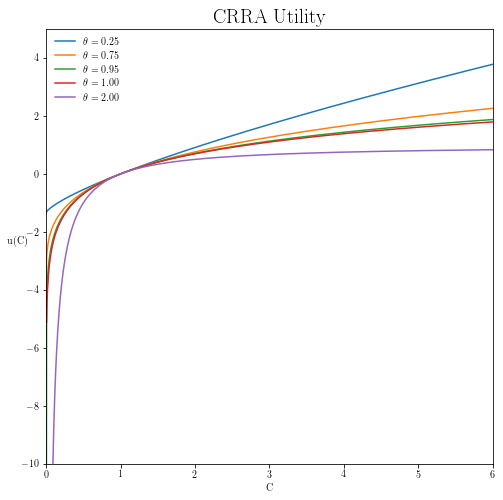

/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:135: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:135: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


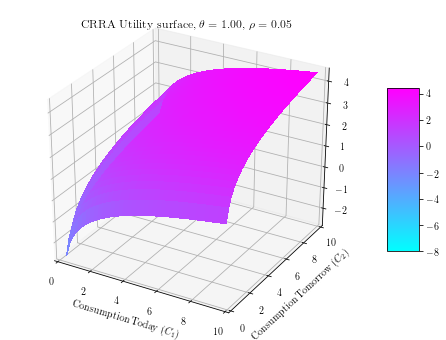

/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log


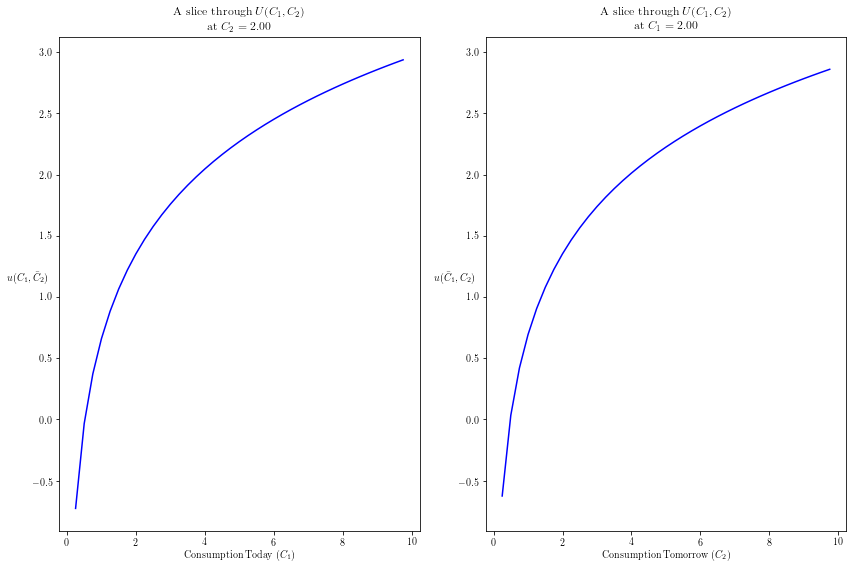

/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log


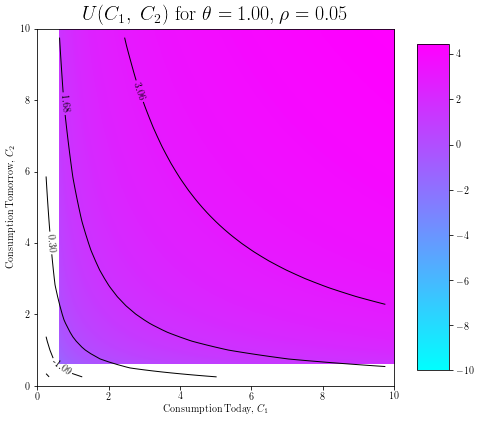

Optimal choice of C1 is:        4.985488293001099
Optimal choice of C2 is:        5.014874499673874
Utility from optimal bundle is: 1.2080381646963043


/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in power


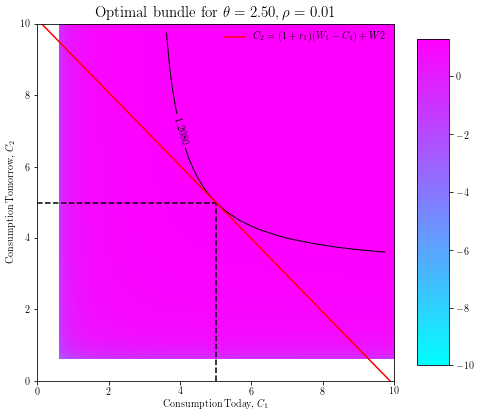

Numeric k*:   19.602857582146562
Analytic k*:  19.60285758306458
Numeric c*:   2.0381476236311964
Analytic c*:  2.0381476236391665


/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:882: RuntimeWarning: invalid value encountered in double_scalars
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:513: RuntimeWarning: invalid value encountered in double_scalars
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:857: RuntimeWarning: invalid value encountered in double_scalars


The sympyprinting extension is already loaded. To reload it, use:
  %reload_ext sympyprinting
[[1.01262942182 -0.992528054819]
 [-0.00155368796866 1.00152284623]]
[[ 1.01262942 -0.99252805]
 [-0.00155369  1.00152285]]
[1.04673616 0.9674161 ]
[[ 0.9994101   0.99896404]
 [-0.03434323  0.0455065 ]]
[[ 1.01262942 -0.99252805]
 [-0.00155369  1.00152285]]
[1.04673616 0.9674161 ]
[[ 0.9994101   0.99896404]
 [-0.03434323  0.0455065 ]]


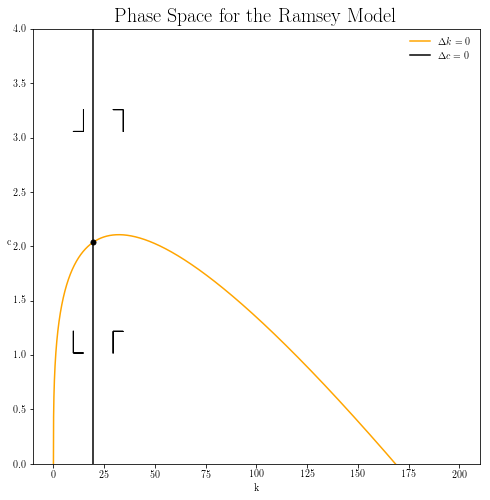

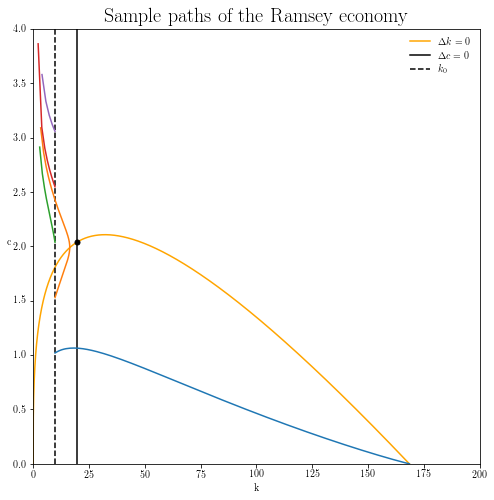

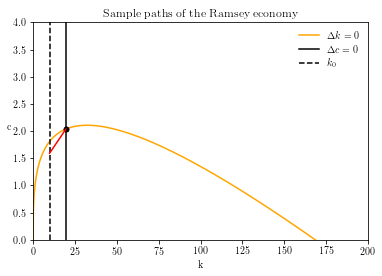

/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:513: RuntimeWarning: invalid value encountered in double_scalars
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:857: RuntimeWarning: invalid value encountered in double_scalars


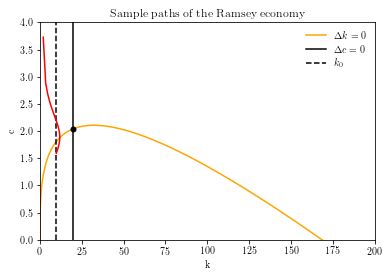

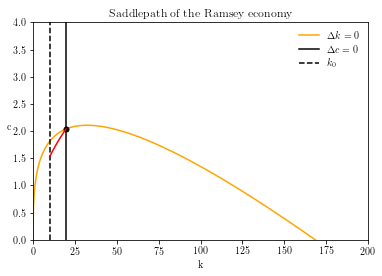

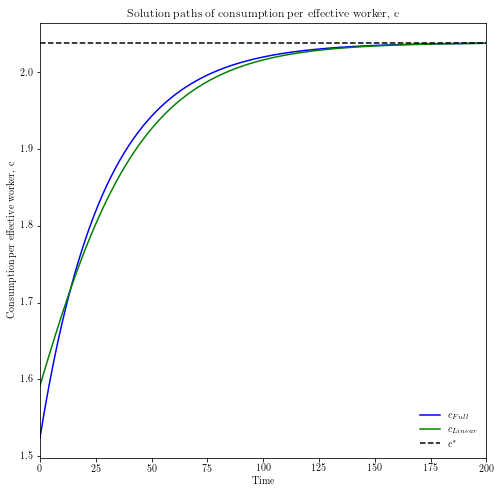

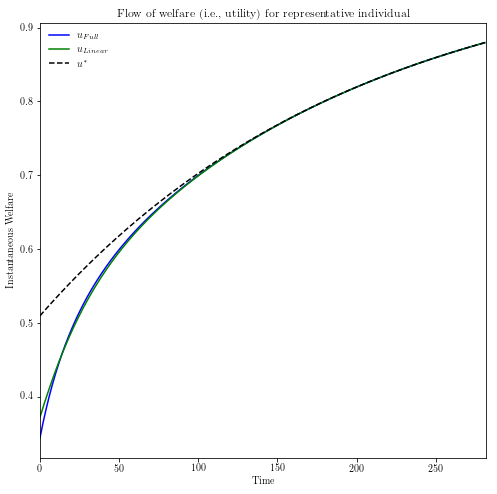

Lifetime utility from the non-linear solution:  7571.550852576065
Lifetime utility from the linearized solution:  7570.323529364591


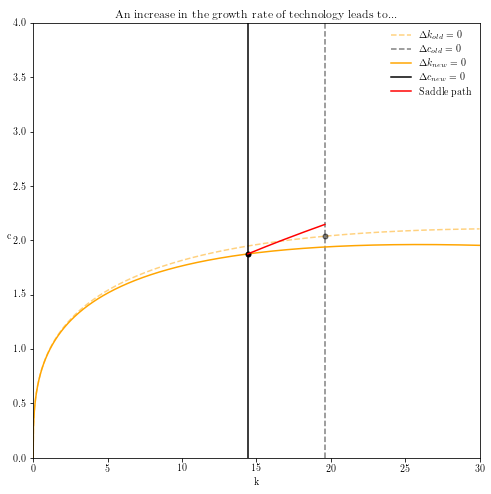

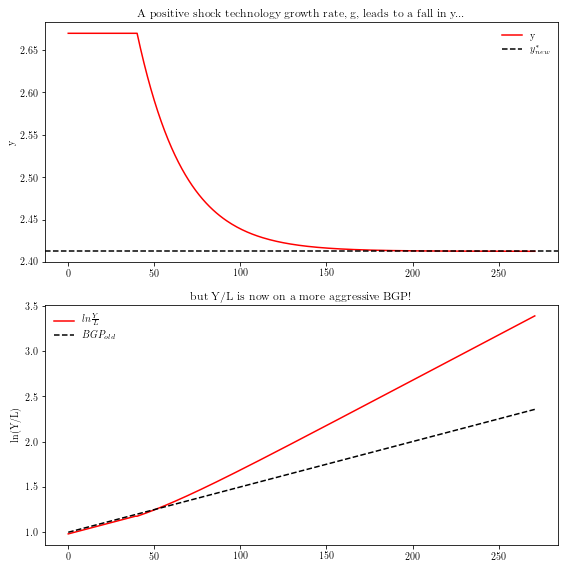

In [9]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <markdowncell>

# The Ramsey Model:
# =================
# 
# In the previous lab, we learned how to simulate a deterministic, discrete time version of the Solow growth model where the savings rate of the economy was taken to be exogenous.  In this lab, we will learn how to solve and simulate a deteministic, discrete time version of the Ramsey model where the savings rate is endogenously chosen optimally by the representative household.  Although the Ramsey model is being presented after the Solow model (primarily because it involves optimizing on the parts of houeholds which makes the model technically more "sophisticated"), the optimization bits of the Ramsey model intellectually predate the Solow model by almost 30 years! Also, unlike the Solow model which was designed to be a decriptive model of economic growth, the Ramsey model was originally designed to be a normative, mathematical solution to the problem of how to optimal choose the savings rate for a society.  
# 
# I highly recommend that you take a glance through [Frank Ramsey's](http://en.wikipedia.org/wiki/Frank_P._Ramsey) original paper, entitled [A Mathematical Theory of Saving](http://folk.uio.no/gasheim/zRam1928.pdf).  In particular the introduction where Ramsey states that the common practice amongst economists and decision theorists of discounting the future was "ethicially indefensible and arises mearly from the weakness of the imagination."  Ramsey leaves little doubt that his paper was normative and not positive in character.  Finally, there is not a single citation at the end of Ramsey's paper: he simply signed his name!  Apparently, for this model at least, Ramsey owed no intellectial debts. 

# <codecell>

import numpy as np
import mpmath as mp
import sympy
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# <markdowncell>

# Task 1: Get to know your utility function!
# ------------------------------------------
# 
# In this task you will plot the representative agent's utility function:
# 
# $$u(C) = \frac{C^{1 - \theta} - 1}{1 - \theta}$$
# 
# The Ramsey model assumes that the representative individual has CRRA utility.  Individual utility is a function of consumption per person, C. The parameter,  $0 \lt \theta$, plays a dual role:
# 
# * $\theta$ is the agent's coefficient of relative risk aversion
# * $\frac{1}{\theta}$ is the agent's elasticity of inter-temporal substitution
# Things to consider:
# 
# When $0 \lt \theta$ but "close" to zero, consumer has almost linear (i.e., risk neutral) utility. As $\theta$ increases, households becomes more risk averse (i.e., the curvature of the utility function increases!). Note that this increase in curvature becomes most apparent in the behavior of the utility function for levels of consumption less than 1. As $\theta$ increase the "penalty" for consuming less than 1 unit becomes increasingly severe!
# 
# Why is there a '-1' in the numerator come from? It has the effect of making total utility positive or negative depending on whether C is greater than or less than one. Also 
# 
# $$\lim_{\theta \rightarrow 1}\ \frac{C^{1 - \theta} - 1}{1 - \theta}\ =\ \mathrm{ln}\ C$$.

# <codecell>


# <codecell>

# my solution!
def u(C):
    """
    
    The Ramsey model assumes that the representative individual has CRRA utility.      
    Individual utility is a function of consumption per person, C. The parameter, 
    0 < theta, plays a dual role: 
        
        1) theta is the agent's coefficient of relative risk aversion
        2) 1 / theta is the agent's elasticity of inter-temporal substitution
    
    N.B.: If theta = 1, then CRRA utility is equivalent to log utility! 
    
    Inputs:
        1) C: consumption per worker
        
    Returns:
        1) the value of utility from consumption
        
    """
    if theta != 1:
        return (C**(1 - theta) - 1) / (1 - theta)
    else:
        return np.log(C)

# <codecell>

# Check to make sure that the utility function is working properly
theta = 0.5
u(10)

# <markdowncell>

# Let's plot this utility function for different values of $\theta$. Note how the curvature of the function increases with the agent's level of risk aversion (i.e., $\theta$).

# <codecell>

# Create a grid of points for plotting
gridmax, gridsize = 6, 1000
grid = np.linspace(0, gridmax, gridsize)

# Create a new figure
plt.figure(figsize=(8,8))

# Plot utility for varying values of theta
theta = 0.25
plt.plot(grid, u(grid), '-', label=r'$\theta=%.2f$' %theta)

theta = 0.75
plt.plot(grid, u(grid), '-', label=r'$\theta=%.2f$' %theta)

theta = 0.95
plt.plot(grid, u(grid), '-', label=r'$\theta=%.2f$' %theta)

# N.B.: theta=1 is logarithmic utility!
theta = 1
plt.plot(grid, u(grid), '-', label=r'$\theta=%.2f$' %theta)

theta = 2
plt.plot(grid, u(grid), '-', label=r'$\theta=%.2f$' %theta)

# Don't forget to label your axes!
plt.xlabel('C')
plt.ylabel('u(C)', rotation='horizontal')
plt.axis([0, 6, -10, 5])

# Add a title to the plot
plt.title('CRRA Utility', fontsize=20, weight='bold')

# Add a legend
plt.legend(loc=0, frameon=False)

# save and display figure!
plt.savefig('Graphics/CRRA Utility.png')
plt.show()

# <markdowncell>

# ### Inter-temporal Utility:
# 
# 
# In this part of Task 1 you will learn how to generate a 3D plot of a CRRA utility surface for an agent who lives for two-periods and has CRRA preferences in order to better understand the inter-termporal consumption trade-off.  This agent's lifetime utility is as follows:  
# 
# $$U(C_{1}, C_{2}) = u(C_{1}) + e^{-\rho}u(C_{2}) $$
# 
# Insert the Python code for this function in the cell below.

# <codecell>

def U(C1, C2):
    """
    
    Lifetime utility function for an agent who lives for only two periods.  The 
    parameter rho > 0 is the discount rate (alternatively could set a discount
    factor, 0 < beta < 1, where beta = np.exp(-rho)).
    
    Inputs:
        1) C1: consumption per worker in period 1
        2) C2: consumption per worker in period 2
        
    Returns:
        1) Value of utility for lifetime consumption
         
    """
    return #insert code here!

# <codecell>

# my solution!
def U(C1, C2):
    """
    
    Lifetime utility function for an agent who lives for only two periods.  The 
    parameter rho > 0 is the discount rate (alternatively could set a discount
    factor, 0 < beta < 1, where beta = np.exp(-rho)).
    
    Inputs:
        1) C1: consumption per worker in period 1
        2) C2: consumption per worker in period 2
        
    Returns:
        1) Value of utility for lifetime consumption
         
    """
    return u(C1) + np.exp(-rho) * u(C2)

# <codecell>

# create a new Figure object 
fig = plt.figure(figsize=(8,6))

# create a 3D Axes object
ax = fig.gca(projection='3d', elev=30, azim=300)

# create a grid of (x,y) values which we will pass to function
C_today = np.arange(0, 10, 0.25)
C_tomorrow = np.arange(0, 10, 0.25)
C1, C2 = np.meshgrid(C_today, C_tomorrow)

# Choose parameter values
theta, rho = 1.0, 0.05

# we will actually plot output
utility = U(C1, C2)

# note the use of the new plot command!
utility_surface = ax.plot_surface(C1, C2, utility, rstride=1, cstride=1, cmap=mpl.cm.cool, 
                                  linewidth=0, vmin=-8, vmax=np.max(utility), antialiased=False)

# adjust axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# don't forget to label your axes!
ax.set_xlabel(r'Consumption Today ($C_{1}$)')
ax.set_ylabel(r'Consumption Tomorrow ($C_{2}$)')

# add a title!
ax.set_title(r'CRRA Utility surface, $\theta=%.2f$, $\rho=%.2f$' %(theta, rho))

# add a colorbar
fig.colorbar(utility_surface, shrink=0.5, aspect=5)

plt.savefig('Graphics/CRRA-Utility-Surface.png')

# display the plot!
plt.show()

# <markdowncell>

# Can compare how this agent values consumption today and consumption tomorrow by comparing marginal utilities...

# <codecell>

# fix C1_bar and C2_bar
C1_bar, C2_bar = 2, 2

# create a new figure object!
fig = plt.figure(figsize=(12,8))

# first subplot will fix C2 at C2_bar and plot U(C1, C2_bar)
ax1 = fig.add_subplot(121)
ax1.plot(C_today, U(C_today, C2_bar), 'b-')

# axes, labels, title. legend, etc
ax1.set_xlabel('Consumption Today ($C_{1}$)')
#ax1.set_ylim(-8, 2)
ax1.set_ylabel(r'$u(C_{1}, \bar{C}_{2})$', rotation='horizontal')
ax1.set_title('A slice through $U(C_{1}, C_{2})$\nat $C_{2}=%.2f$' %C2_bar)

# second subplot will fix C1 at some constant C1_bar and plot U(C1_bar, C2)
ax2 = fig.add_subplot(122, sharey=ax1)
ax2.plot(C_tomorrow, U(C1_bar, C_tomorrow), 'b-')

# axes, labels, title. legend, etc
ax2.set_xlabel('Consumption Tomorrow ($C_{2}$)')
ax2.set_ylabel(r'$u(\bar{C}_{1}, C_{2})$', rotation='horizontal')
ax2.set_title('A slice through $U(C_{1}, C_{2})$\nat $C_{1}=%.2f$' %C1_bar)

# tighten things up and savefig
plt.tight_layout()
plt.savefig('Graphics/Comparing-marginal-utilities.png')
plt.show()

# <markdowncell>

# ### Trade-off between consumption today and consumption tomorrow
# 
# In order to graphically analyze the trade-off between consumption across time we need to be able to plot the set of indifference curves implied by the household's utility function.  The code in the cell below defines a creates a contour plot of the above 3D utility surface in two dimensions and then overlays a set of contour lines for various values of utility.  These contour lines are indifference curves!

# <codecell>

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Choose parameter values
theta, rho = 1.0, 0.05

# we will actually plot utility
utility = U(C1, C2)

# create the contour plot
utility_surface = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.cool, 
                            vmin=-10, vmax=np.max(utility), extent=(0, 10, 0, 10))

# demarcate the contours...
CS = ax.contour(C1, C2, utility, np.linspace(-8, np.max(utility), 10), colors=np.repeat('k', 10), 
                linewidths=1, linestyles='solid')
ax.clabel(CS, inline=1, fmt='%1.2f')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel(r'Consumption Today, $C_{1}$')
ax.set_ylabel(r'Consumption Tomorrow, $C_{2}$')
ax.set_title(r'$U(C_{1},\ C_{2})$ for $\theta=%.2f, \rho=%.2f$' %(theta, rho), fontsize=20)
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

# save and plot figure!
plt.savefig('Graphics/Contour-plot-for-CRRA-utility-surface.png')
plt.show()

# <markdowncell>

# To see what the above preferences imply about the representative agent's optimal choices for consumption today and consumption tomorrow, suppose the can work for a representative firm and earn labor income $W_{1}$ today and $W_{2}$ tomorrow (note that we are assuming that agent's labor endowment is normalized to unity, and that agent supplies his entire labor endowment in both periods). These assumptions imply that the houshold budget constraint is
# 
# $$C_{1} + \frac{1}{1 + r_{1}}C_{2} = W_{1} + \frac{1}{1 + r_{1}}W_{2}$$ 
# 
# To find optimal consumption bundle, set up the Lagrangian: $$\max_{C_{1},C_{2}}\ \frac{C_{1}^{1 - \theta} - 1}{1 - \theta} + e^{-\rho}\left(\frac{C_{2}^{1 - \theta} - 1}{1 - \theta}\right) + \lambda\left[W_{1} + \frac{1}{1 + r_{1}}W_{2} - C_{1} - \frac{1}{1 + r_{1}}C_{2}\right]$$
# 
# FOC and the budget constraint yield a system of 3 equation in 3 unknowns $C_{1}, C_{2}, \lambda$:
# 
# $$C_{1}^{-\theta} - \lambda = 0$$
# 
# $$e^{-\rho}C_{2}^{-\theta}-\frac{1}{1 + r_{1}}\lambda = 0$$
# 
# $$C_{1} + \frac{1}{1 + r_{1}}C_{2} = W_{1} + \frac{1}{1 + r_{1}}W_{2}$$ 
# 
# One can reduce the above to a 2 equation non-linear system in 2 unkowns by eliminating $\lambda$:
# 
# $$C_{1}^{-\theta} = e^{-\rho}(1 + r_{1})C_{2}^{-\theta}$$
# 
# $$C_{1} + \frac{1}{1 + r_{1}}C_{2} = W_{1} + \frac{1}{1 + r_{1}}W_{2}$$ 
# 
# One could do a bit more algebra to solve this two equation system analytically by solving for $C_{1}$ and $C_{2}$ as functions of prices and model parameters, but since this is a computational course we will practice using **fsolve** to find the optimal value for us!  First, we need to define some prices...

# <codecell>

# define parameter values
theta, rho = 2.5, 0.01
 
# Specify some prices (i.e., wages and interest rates) all of which agent take as given
W1, W2, r1 = 5, 5, 0.025

# <markdowncell>

# Next, we need to use re-write the above system into a a system of two implicit functions which we can then use **fsolve** to find the values of $C_{1}$ and $C_{2}$ that make both equations simulataneously zero...

# <codecell>

# Define implicit functions using the FOC
def F1(C1, C2): 
    """
    
    Implicit function derived from the Euler equation.

    """
    return C1**(-theta) - np.exp(-rho) * (1 + r1) * C2**(-theta)
    
def F2(C1, C2): 
    """
    
    Implicit function derived from the budget constraint.

    """
    return W1 + (1 / (1 + r1)) * W2 - C1 - (1 / (1 + r1)) * C2

# <codecell>

# First need to define a function that fsolve can optimize
def optimalBundle(X):
    out = [F1(X[0], X[1])]
    out.append(F2(X[0], X[1]))
    return out

# Apply fsolve()...note that we need to give the algorithm a decent guess!
C1_init, C2_init = 0.5, 0.5
C1_Star, C2_Star = optimize.fsolve(func=optimalBundle, x0=(C1_init, C2_init))
U_Star = U(C1_Star, C2_Star)

# <codecell>

# what is the optimal bundel?
print( "Optimal choice of C1 is:       ", C1_Star)
print( "Optimal choice of C2 is:       ", C2_Star)
print( "Utility from optimal bundle is:", U_Star)

# <codecell>

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# we will actually plot utility
utility = U(C1, C2)

# create the contour plot
utility_surface = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.cool, 
                            vmin=-10, vmax=np.max(utility), extent=(0, 10, 0, 10))

# plot the budget constraint
consumption_today = np.linspace(0, 10, 100)
ax.plot(consumption_today, (1 + r1) * (W1 - consumption_today) + W2, 
        color='r', label=r'$C_{2}=(1 + r_{1})(W_{1} - C_{1}) + W2$')

# demarcate the indifference curve...
CS = ax.contour(C1, C2, utility, np.array([U_Star]), colors='k', linewidths=1, linestyles='solid')
ax.clabel(CS, inline=1, fmt='%1.4f')

# mark the optimal bundle
ax.hlines(C1_Star, 0, C2_Star, linestyle='dashed')
ax.vlines(C2_Star, 0, C1_Star, linestyle='dashed')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel(r'Consumption Today, $C_{1}$')
ax.set_ylabel(r'Consumption Tomorrow, $C_{2}$')
ax.set_title(r'Optimal bundle for $\theta=%.2f, \rho=%.2f$' %(theta, rho), fontsize=15)
ax.legend(loc=1, frameon=False)
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

# save and plot figure!
plt.savefig('Graphics/Optimal-Consumption-Bundle.png')
plt.show()

# <markdowncell>

# Task 2: Coding the Ramsey model in Python
# -----------------------------------------
# 
# Definition of exogenous parameters of the Ramsey Model
# 
# * $\theta$: coefficient of relative risk aversion
# * $\beta$: discount factor
# * $\rho$: discount rate
# * $A_{0}$: initial level of technology
# * $g$: growth rate of technology
# * $L_{0}$: initial level of population
# * $n$: population growth rate
# * $H$: household size
# * $\delta$: rate of capital depreciation
# * $\alpha$: capital share of output

# <codecell>

# code the following parameter values 
theta = 2.0
beta = 0.99
rho = - np.log(beta)
A0 = 1.0
g = 0.005 
L0 = 100
n = 0.0025 
H = 1.0
delta = 0.025 
alpha = 0.33

# <codecell>

# Sanity check for parameter values!  Why does this need to be satisfied?
rho - n - (1 - theta) * g > 0

# <markdowncell>

# ### Exercise:
# 
# In the cell below I have provided code for the consumption Euler equation as well as code for two implicit functions defining the the behavior of $k$ and $c$ in te neigborhood of the steady state of the Ramsey economy.  You task is to write functions for:
# 
# * the intensive form of the Cobb-Douglas production function, $f(k_{t})$
# * the evolution of capital per effective worker, $k_{t+1}$, in term of $k_{t}$ and $c_{t}$.
# * the implicit function describing the evolution of capital per effective worker in the neighborhood of the steady state.
# * the implicit function describing the consumption euler equation in the neighborhood of the steady state.
# 
# You should be familiar enough with the intensive form of the production function to either recall it from memory or find it in your notes somewhere.  Here is the equation of motion for capital:
# 
# $$k_{t+1} = e^{-(n + g)}(f(k) + e^{-\delta}k_{t} - c_{t}) $$

# <codecell>

"""

Coding the key equations of the Ramsey model. Like the Solow model, we want all 
variables to measured in units per effective worker in order for all variables
to be constant in steady state.
  
Define:
    1) y_t = Y_t / (A_t * L_t)
    2) k_t = K_t / (A_t * L_t) 
    3) c_t = C_t / A_t  

"""



def euler(k, c):
    """
    
    Via the consumption Euler equation, next period's consumption per
    effective worker can be written as a function of current period 
    consumption and capital stock (both per effective worker).
    
    Inputs:
        1) k_t: next period's level of capital per effective worker
        2) c_t: current period's level of consumption per effective worker
        
    Returns:
        1) c_t+1: next period's consumption per effective worker
        
    """
    return np.exp(-g) * (np.exp(-rho) * (np.exp(-delta) + alpha * capital(k, c)**(alpha - 1)))**(1 / theta) * c
    


# <codecell>

# my solutions
def f(k):
    """
    
    In your lectures you will have been introduced to the intensive form of 
    the production function.  The intensive form of the production function 
    expresses output per effective worker, y, as a function of the capital 
    stock per effective worker, k.
    
    Inputs:
        1) k_t: current period's level of capital per effective worker
        
    Returns:
        1) y_t: current period's output per effective worker
        
    """
    return k**alpha

def capital(k, c):
    """
    
    Next period's capital stock per effective worker can be written as a 
    function of current period consumption and capital stock (both per 
    effective worker).
    
    Inputs:
        1) k_t: current period's level of capital per effective worker
        2) c_t: current period's level of consumption per effective worker
        
    Returns:
        1) k_t+1: next period's capital stock per effective worker
        
    """
    return np.exp(-(n + g)) * (f(k) + np.exp(-delta) * k - c)

def F1(k, c):
    """
    
    Can express the change in capital stock per effective worker between 
    any two periods as follows:
        
        k_t+1 - k_t = capital(k, c) - k_t
    
    In steady-state, capital stock per effective worker must be constant, 
    and thus the LHS of the above must be zero. This implies that, the 
    steady state values of k and c will solve the following equation:
    
        capital(k, c) - k = 0
    
    """
    return capital(k, c) - k
    
def F2(k, c):
    """
    
    Can express the change in consumption per effective worker between 
    any two periods as follows:
        
        c_t+1 - c_t = euler(k, c) - c
    
    In steady-state, consumption per effective worker must be constant, 
    and thus the LHS of the above must be zero. This implies that, the 
    steady state values of k and c will solve the following equation:
    
        euler(k, c) - c = 0
    
    """
    return euler(k, c) - c

# <markdowncell>

# Task 3: Finding the steady-state values of k and c for the Ramsey economy
# -------------------------------------------------------------------------
# 
# Just as we did for the Solow model, we will need to solve for the steady-state values of k and c as a precursor to solving the for the full optimal paths of $k$ and $c$ (which consitute the solution to the Ramsey model!).  We will use two different methods:
# 
# 1. Define Python functions that express the steady-state values of k and c in terms of the parameters of the model.
# 2. Solve for the steady-state values of k and c using **fsolve**
# 
# First. you will need to program the steady-state values for $k$ and $c$:

# <codecell>

# Define the steady-state values of the state variables k and c

# <codecell>

# my solutions
def k_star(): 
    """
    
    The steady-state level of capital stock per effective worker, k_star, 
    in the Ramsey model is a function of the exogenous parameters!
    
    N.B.: The function takes no arguments because parameters are defined above!
    """
    return ((alpha * np.exp(-rho)) / (np.exp(theta * g) - np.exp(-(rho + delta))))**(1 / (1 - alpha))
    
def c_star(): 
    """
    
    The steady-state level of consumption per effective worker, c_star, 
    in the Ramsey model is a direct function of the exogenous parameters 
    and the steady-state level of capital stock per effective worker 
    (which is itself a function of only exogenous parameters).
    
    N.B.: The function takes no arguments because parameters are defined above!
    """
    return f(k_star()) + (np.exp(-delta) - np.exp(n + g)) * k_star()

# <codecell>

# Display k_star and c_star for our chosen parameter values
k_star(), c_star()

# <markdowncell>

# Use fsolve to find find the steady-state values of k and c numerically.  Equations **capital** and **euler** form a 
# coupled two equation dynamical system in two unknowns.  Above we have defined two implicit functions F1 and F2 such that:
#     
#     F1(k_Star, c_Star) = 0
#     F2(k_Star, c_Star) = 0
# 
# Thus, mathematically, the problem of finding the steady-state values of k and c, is "simply" a root-finding problem! 
# To find the root of this equation we will again use the function **fsolve()** from the scipy.optimize package.

# <codecell>

# First need to define a function that fsolve can optimize
def ramseySteadyState(X):
    out = [F1(X[0], X[1])]
    out.append(F2(X[0], X[1]))
    return out

# Apply fsolve()...note that we need to give the algorithm a decent guess!
k0, c0 = 3, 1
k_Star, c_Star = optimize.fsolve(func=ramseySteadyState, x0=(k0, c0))

# <codecell>

# Display numerical steady-state values and compare to analytic solutions
print( "Numeric k*:  ", k_Star)
print( "Analytic k*: ", k_star())
print( "Numeric c*:  ", c_Star)
print( "Analytic c*: ", c_star())

# <markdowncell>

# ###Exercise:
# 
# Re-run the above code that uses fsolve() to find the steady state values $k^*$ and $c^*$, but instead of passing initial guesses of $k_{0}=3$, and $c_{0} = 1$, try guessing $k_{0} = 3$ and $c_{0} = 4.5$.  What happens?  Can you figure out why **fsolve** is failing?

# <codecell>

# insert code here!

# <markdowncell>

# Task 4: Graphical analysis of the Ramsey model
# ----------------------------------------------
# 
# In this task you will learn how to create a plot of the Ramsey phase diagram.

# <codecell>

# First a useful function for plotting...
def locusK(k):
    """
    
    In order to plot the phase diagram, we need a function that 
    takes k as an input and return the value of c consistent with 
    F1(k, c) = 0! 
    
    Inputs:
        1) k: capital stock per effective worker
        
    Returns:
        1) c: consumption per effective worker 
        
    """
    return f(k) - (np.exp(n + g) - np.exp(-delta)) * k

# Create a grid of points for plotting
gridmax, gridsize = 200, 10000
grid = np.linspace(0, gridmax, gridsize)

# Create a new figure
plt.figure(figsize=(8,8))

# Add the c and k locii
plt.plot(grid, locusK(grid), '-', color='orange', label=r'$\Delta k=0$')
plt.axvline(k_star(), color='black', label=r'$\Delta c=0$')
plt.plot(k_star(), c_star(), marker='.', markersize=10, color='k')

# Add arrows to indicate out of steady-state dynamics
x_len = 0.025 * gridmax 
y_len = 1 / x_len   

plt.arrow(x=0.5 * k_star(), y=0.5 * c_star(), dx=0, dy=y_len)
plt.arrow(x=0.5 * k_star(), y=0.5 * c_star(), dx=x_len, dy=0)

plt.arrow(x=0.5 * k_star() + x_len, y=1.5 * c_star(), dx=0, dy=y_len)
plt.arrow(x=0.5 * k_star() + x_len, y=1.5 * c_star(), dx=-x_len, dy=0)

plt.arrow(x=1.5 * k_star(), y=0.5 * c_star() + y_len, dx=0, dy=-y_len)
plt.arrow(x=1.5 * k_star(), y=0.5 * c_star() + y_len, dx=x_len, dy=0)

plt.arrow(x=1.5 * k_star() + x_len, y=1.5 * c_star() + y_len, dx=0, dy=-y_len)
plt.arrow(x=1.5 * k_star() + x_len, y=1.5 * c_star() + y_len, dx=-x_len, dy=0)

# Don't forget to label your axes!
plt.xlabel('k')
plt.ylim(0, 4)
plt.ylabel('c', rotation='horizontal')

# Add a title to the plot
plt.title('Phase Space for the Ramsey Model', fontsize=20, weight='bold')

# Add the legend
plt.legend(frameon=False)

plt.savefig('Graphics/Ramsey-Phase-Diagram.png')

# <markdowncell>

# Task 5: Stability and Dynamics
# ------------------------------
# 
# In this task you will learn how to simulate the deterministic Ramsey model and analyze the stability properties of a two-dimensional system.  Assessing dynamic stability of the Ramsey model is slightly more involved than was the case with the Solow model. Fundamentally, the reason is that the Ramsey model is defined by the equations **capital(k, c)** and **euler(k, c)** (i.e., a system of two equations in two unknowns) whereas the Solow model had only a single equation with one unknown.
# 
# However, the mathematics used to assess dynamic stability of the Ramsey model generalize quite nicely to larger models. To check dynamic stability, we need to:
# 
# 1. Construct a matrix of partial derivatives (i.e., the Jacobian). Unlike the Solow model, where by hand differentiation was not that hard, computing the partial derivatives for the Ramsey model is extremely tedious. However, in the Solow Lab you learned how to get Python to differentiate functions for you, so no need to bother with hand calculations!
# 2. Evaluate the partial derivatives at the steady-state values k_Star and c_Star
# 3. Calculate the eigenvalues of the Jacobian matrix.
# 
# Stability implies that the number of eigenvalues greater than 1 match the number of jump (or forward looking or control or choice) variables. In the Ramsey model there is one forward-looking variable: consumption per effective worker, c; and one backward-looking variable capital stock per effective worker, k. Thus we expect to find a single eigenvalue greater than 1!
# 
# Just to reinforce the usefulness of numerical/symbolic differentiation as a solution to these types of problems, we will compute and evaluate the partial derivatives in three ways 1) by-hand, 2) symbolically using Python, and 3) numerically using Python.

# <codecell>

""""

Simulating the deterministic Ramsey model

"""

class ramseyModel(object):
    
    def __init__(self, params, k=None, c=None):
        """
        
        Represents the Ramsey model 
        
        Definition of exogenous parameters of the Ramsey Model
            1) theta: coefficient of relative risk aversion 
            2) beta: discount factor
            3) rho: discount rate
            4) A0: initial level of technology
            5) g: growth rate of technology
            6) L0: initial level of population
            7) n: population growth rate
            8) H: household size
            9) delta: rate of capital depreciation
            10) alpha: capital share of output

        Attributes: 
            1) params: a dictionary of parameters and their values (i.e., {'alpha':0.33, ...}.
            2) k: an initial condition for the state variable k (i.e., capital per
                  effective worker!)
            3) c: an initial condition for the control variable c (i.e., consumption per
                  effective worker!)
        
        """
        # current value of state variable, k
        self.k            = k
        # current value of the control variable, c
        self.c            = c
        # dictionary of parameter values
        self.param_dict   = params
        # dictionary of steady state values        
        self.SS_dict      = {'k_star':self.set_k_star(self.param_dict), 
                             'c_star':self.set_c_star(self.param_dict),
                             's_star':self.set_s_star(self.param_dict)}
        
    def set_k_star(self, params): 
        """
    
        The steady-state level of capital stock per effective worker, k_star, 
        in the Ramsey model is a function of the exogenous parameters!
    
        """
        # extract params
        n     = params['n']
        g     = params['g']
        alpha = params['alpha']
        delta = params['delta']
        rho   = params['rho']
        theta = params['theta']
    
        return ((alpha * np.exp(-rho)) / (np.exp(theta * g) - np.exp(-(rho + delta))))**(1 / (1 - alpha))
    
    def set_c_star(self, params): 
        """
    
        The steady-state level of consumption per effective worker, c_star, 
        in the Ramsey model is a direct function of the exogenous parameters 
        and the steady-state level of capital stock per effective worker 
        (which is itself a function of only exogenous parameters).
    
        """
        # extract params
        n      = params['n']
        g      = params['g']
        alpha  = params['alpha']
        delta  = params['delta']
        k_star = self.set_k_star(params)
        
        return k_star**alpha + (np.exp(-delta) - np.exp(n + g)) * k_star
    
    def set_s_star(self, params):
        """ 

        Steady state savings rate of the Ramsey economy
    
        """
        # extract params
        n     = params['n']
        g     = params['g']
        alpha = params['alpha']
        delta = params['delta']
        rho   = params['rho']
        theta = params['theta']
        
        s     = alpha * np.exp(-rho) * (np.exp(n + g) - np.exp(-delta)) / \
                (np.exp(theta * g) - np.exp(-(rho + delta)))
        return s
    
    def capital(self, k, c):
        """
    
        Next period's capital stock per effective worker can be written as a 
        function of current period consumption and capital stock (both per 
        effective worker).
    
        Inputs:
            1) k_t: current period's level of capital per effective worker
            2) c_t: current period's level of consumption per effective worker
        
        Returns:
            1) k_t+1: next period's capital stock per effective worker
        
        """
        # extract params
        n     = self.param_dict['n']
        g     = self.param_dict['g']
        alpha = self.param_dict['alpha']
        delta = self.param_dict['delta']
    
        return np.exp(-(n + g)) * (k**alpha + np.exp(-delta) * k - c)
    
    def euler(self, k, c):
        """
    
        Via the consumption Euler equation, next period's consumption per
        effective worker can be written as a function of current period 
        consumption and capital stock (both per effective worker).
    
        Inputs:
            1) k_t: next period's level of capital per effective worker
            2) c_t: current period's level of consumption per effective worker
        
        Returns:
            1) c_t+1: next period's consumption per effective worker
        
        """
        # extract params
        n     = self.param_dict['n']
        g     = self.param_dict['g']
        alpha = self.param_dict['alpha']
        delta = self.param_dict['delta']
        rho   = self.param_dict['rho']
        theta = self.param_dict['theta']
    
        return np.exp(-g) * (np.exp(-rho) * (np.exp(-delta) + alpha * capital(k, c)**(alpha - 1)))**(1 / theta) * c

    def update(self):
        """
        
        Update the state variables according to k_{t+1} = capital(k_t, c_t, params) and 
        c_{t+1} = euler(k_t, c_t, params).
        
        CRUCIAL that k is updated PRIOR to updating c!

        """
        # remember to always update k first!
        self.k = self.capital(self.k, self.c) 
        self.c = self.euler(self.k, self.c)

    def sample_path(self, n=None):
        """
        
        Generate sample path of length n starting from the current state
        
        """
        path = np.zeros(shape=(n, 2))
        
        for t in range(n):
            path[t, 0] = self.k
            path[t, 1] = self.c
            self.update()
        
        return path

    def steady(self, k0=None, c0=None):
        """
        
        Finds the steady state for the Ramsey economy either using the 
        analytic solution, or using a root solver and an initial guess.
        
        """
        
        def ramseySS(X):
            out = [self.capital(X[0], X[1]) - X[0]]
            out.append(self.euler(X[0], X[1]) - X[1])
            return out

        return optimize.fsolve(func=ramseySS, x0=(k0, c0))
        
    def stability(self):
        """
        
        Computes the Jacobian matrix of partial derivatives (evaluated at steady-state), 
        and then calculates the Jacobian's eigenvalues and eigenvectors.
        
        """
        
        # calculate partial derivatives
        capital_c = mp.diff(f=self.capital, x=(self.SS_dict['k_star'], self.SS_dict['c_star']), n=(0, 1))
        capital_k = mp.diff(f=self.capital, x=(self.SS_dict['k_star'], self.SS_dict['c_star']), n=(1, 0))
        euler_c   = mp.diff(f=self.euler, x=(self.SS_dict['k_star'], self.SS_dict['c_star']), n=(0, 1))
        euler_k   = mp.diff(f=self.euler, x=(self.SS_dict['k_star'], self.SS_dict['c_star']), n=(1, 0))
        
        # define the Jacobian
        jacobian = np.array([[capital_k, capital_c], [euler_k, euler_c]], dtype='float')
        
        # calculate eigenvalues/vectors
        eigenvalues, eigenvectors = np.linalg.eig(jacobian)
        
        return [jacobian, eigenvalues, eigenvectors]

    def forward_shoot(self, k0=None, c0=None, tol=1.5e-08):
        """
        
        Computes the full, non-linear saddle path for the Ramsey model using the 
        'forward shooting' algorithm (see Judd (1992) p. 357 for details). 
        
        """
        # compute steady state values
        k_star, c_star = self.SS_dict['k_star'], self.SS_dict['c_star']
        
        if k0 <= k_star:
            c_l = 0
            c_h = c_star
        else:
            c_l = c_star
            c_h = k0**alpha
        c0 = (c_h + c_l) / 2
        self.k, self.c = k0, c0
    
        # Initialize a counter
        count  = 0
        n_iter = 0
        
        # Forward Shooting Algorithm
        while 1:
            self.update()
            dist = np.abs(((self.k - k_star)**2 + (self.c - c_star)**2)**0.5)
            count = count + 1
            if k0 <= k_star:
                if self.k > k_star:
                    if dist < tol:
                        break
                    else: # initial c_l too low!
                        c_l = c0
                        c0 = (c_h + c_l) / 2
                        self.k, self.c = k0, c0
                        count = 0
                if self.c > c_star:
                    if dist < tol:
                        break
                    else: # initial c_h too high!
                        c_h = c0 
                        c0 = (c_h + c_l) / 2
                        self.k, self.c = k0, c0
                        count = 0
            else:
                if self.k < k_star:
                    if dist < tol:
                        break
                    else: # initial c_l too high!
                        c_h = c0 
                        c0 = (c_h + c_l) / 2
                        self.k, self.c = k0, c0
                        count = 0
                if self.c < c_star:
                    if dist < tol:
                        break
                    else: # initial c_l too low!
                        c_l = c0
                        c0 = (c_h + c_l) / 2
                        self.k, self.c = k0, c0
                        count = 0
                
        self.k, self.c = k0, c0
        solutionPath = self.sample_path(count)

        return [self.c, solutionPath, count, dist]

# <codecell>

# create a dictionary objects storing the parameter values...
params = {'theta':theta, 'rho':rho, 'A0':A0, 'g':g, 'L0':L0, 'n':n, 'H':H, 'delta':delta, 'alpha':alpha}

# <codecell>

# Create an instance of the class ramseyDS
ramsey = ramseyModel(params)

# Set initial levels for c=0.4, and k0=12...
ramsey.k, ramsey.c = 12, 0.4

# ... and check to make sure that the initial values are set correctly
ramsey.k, ramsey.c

# <codecell>

# Update the system by using the update() method and check the new values for c and k
ramsey.update()
ramsey.k, ramsey.c

# <codecell>

# Make sure these values are correct by evaluating our functions at the initial values of c and k.  Result should be identical!
ramsey.capital(12, 0.4), ramsey.euler(12, 0.4)

# <codecell>

# Generate a sample path of length 10 for the Ramsey economy using the sample_path() method
ramsey.sample_path(10)

# <codecell>

# Check that the method steady() returns the same steady-state values obtained above
ramsey.steady(k0=3, c0=1)

# <markdowncell>

# Plotting sample paths of the Ramsey economy by re-creating figure 2.4 from Romer 4th ed.

# <codecell>

# Create a grid of points for plotting
gridmax, gridsize = 200, 10000
grid = np.linspace(0, gridmax, gridsize)

# Create a new instance of the class ramseyDS
ramsey = ramseyModel(params)

# Given an initial level of capital
k0 = 0.5 * ramsey.SS_dict['k_star']

# Create an array of initial conditions for choices of consumption per effective worker
initial_consumption = np.linspace(0.5 * ramsey.SS_dict['c_star'], 1.5 * ramsey.SS_dict['c_star'], num=5)

# Create a new plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Add the c and k locii
ax.plot(grid, locusK(grid), '-', color='orange', label=r'$\Delta k=0$')
ax.axvline(ramsey.SS_dict['k_star'], color='k', label=r'$\Delta c=0$')
ax.plot(ramsey.SS_dict['k_star'], ramsey.SS_dict['c_star'], marker='.', markersize=10, color='k')

# Add the initial level of capital per worker
ax.axvline(k0, color='k', ls='--', label=r'$k_{0}$')

# FOR loop plots a sample path for each initial value of c
for c in initial_consumption:
    ramsey.k, ramsey.c = k0, c
    tmpPath = ramsey.sample_path(1000) 
    ax.plot(tmpPath[:, 0], tmpPath[:, 1])

# Don't forget to label your axes!
ax.set_xlim(0, 200)
ax.set_xlabel('k')
ax.set_ylim(0, 4)
ax.set_ylabel('c', rotation='horizontal')

# Add a title to the plot
ax.set_title('Sample paths of the Ramsey economy', fontsize=20, weight='bold')

# Add a legend
ax.legend(frameon=False)

plt.savefig('Graphics/Ramsey-Sample-Paths.png')

# <markdowncell>

# ### Computing the Jacobian matrix of partial derivatives
# 
# ### Method 1: Differentiation by-hand. 
# 
# Here are expressions for the partial derivatives of the two equation, that I derived by hand...note some of them are ugly!

# <codecell>

k_c = -np.exp(-(n + g))
k_k = np.exp(-(n + g)) * (np.exp(-delta) + alpha * k_star()**(alpha - 1))
c_c = np.exp(-g) * (np.exp(-rho) * (np.exp(-delta) + \
      alpha * capital(k_star(), c_star())**(alpha - 1)))**(1 / theta) + \
      (np.exp(-g) / theta) * (np.exp(-rho) * (np.exp(-delta) + \
      alpha * capital(k_star(), c_star())**(alpha - 1)))**((1 - theta) / theta) * (np.exp(-rho) * alpha * (alpha - 1) * capital(k_star(), c_star())**(alpha - 2)) * (-np.exp(-(n + g))) * c_star()
c_k = (np.exp(-g) / theta) * (np.exp(-rho) * (np.exp(-delta) + \
      alpha * capital(k_star(), c_star())**(alpha - 1)))**((1 - theta) / theta) * (np.exp(-rho) * alpha * (alpha - 1) * capital(k_star(), c_star())**(alpha - 2)) * np.exp(-(n + g)) * (np.exp(-delta) + \
      alpha * k_star()**(alpha - 1)) * c_star()

# <codecell>

# Create the Jabobian matrix using of partial derivatives evaluated at the steady-state values...
ramseyJacobian_1 = np.array([[k_k, k_c], [c_k, c_c]])
ramseyJacobian_1

# <markdowncell>

# ### Method 2: Symbolic differentiation using SymPy. 
# 
# ### Exercise:
# 
# Write code to differentiate the equation of motion for capital with respect to $k$ and the consumption Euler equation with respect to $c$ (based on the syntax provided).

# <codecell>

# First, need to define k and c as symbolic variables 


# <codecell>

# my solutions
k, c = sympy.var('k, c')
k_c_sym = sympy.diff(capital(k, c), c).simplify()
k_k_sym = sympy.diff(capital(k, c), k).simplify()
c_c_sym = sympy.diff(euler(k, c), c).simplify()
c_k_sym = sympy.diff(euler(k, c), k).simplify()

# <codecell>

# load pretty SymPy printing...
%load_ext sympyprinting

# Display one of the resulting functions as an example of the output...
k_k_sym

# <markdowncell>

# Evaluate these symbolic derivatives at the steady state values of k_star and c_star and compare the results with those obtained from analytic derivatives...

# <codecell>

ramseyJacobian_2 = np.array([[k_k_sym.evalf(n=12, subs={k:k_star(), c:c_star()}), k_c_sym.evalf(n=12, subs={k:k_star(), c:c_star()})], 
                             [c_k_sym.evalf(n=12, subs={k:k_star(), c:c_star()}), c_c_sym.evalf(n=12, subs={k:k_star(), c:c_star()})]])
print(ramseyJacobian_2)

# <markdowncell>

# ### Method 3: Numerical differentiation using Python.  
# 
# Note that we now switch to using numerically determined steady-state values k_Star and c_Star!
# 
# ### Exercise:
# 
# See if you can write the code to numerically differentiate the capital accumulation equation and the consumption Euler equation with respect the $k$ and $c$, using my example as a guide. 

# <codecell>

# <codecell>

# my solution
capital_c = mp.diff(f=capital, x=(k_Star, c_Star), n=(0, 1))
capital_k = mp.diff(f=capital, x=(k_Star, c_Star), n=(1, 0))
euler_c = mp.diff(f=euler, x=(k_Star, c_Star), n=(0, 1))
euler_k = mp.diff(f=euler, x=(k_Star, c_Star), n=(1, 0))

# <codecell>

ramseyJacobian3 = np.array([[capital_k, capital_c], [euler_k, euler_c]], dtype='float')
print(ramseyJacobian3)

# <markdowncell>

# Calculate the eigenvalues of the Jacobian matrix.  Recall that stability of the system requires we have 1 eigenvalue > 1 and a second eigenvalue < 1

# <codecell>

# Compute the eigenvalues and eigenvectors of the Jacobian matrix...
ramseyEigenvalues, ramseyEigenvectors = np.linalg.eig(ramseyJacobian3)

# Display the eigenvalues and eigenvectors...
print(ramseyEigenvalues)
print(ramseyEigenvectors)

# <codecell>

# finally, can use the built in method for computing jacobian and eigenvalues/vectors
ramseyJacobian, ramseyEigenvalues, ramseyEigenvectors = ramsey.stability()

# <codecell>

print(ramseyJacobian)
print(ramseyEigenvalues)
print(ramseyEigenvectors)

# <markdowncell>

# Task 6: Solving the linearized system!
# --------------------------------------
# 
# In this task you will learn how to approximate the optimal consumption/savings decision rule for the representative household using a first-order Taylor series approximation in the neighborhood of the steady state of the Ramsey economy.

# <codecell>

def eulerLinear(k):
    """
    
    This period's consumption per effective worker can be written 
    as a function of current period capital stock per effective worker.
    
    Inputs:
        1) k_t: current period's level of capital per effective worker
        
    Returns:
        1) c_t+1: next period's consumption per effective worker
    """
    if np.abs(ramseyEigenvalues[0]) < 1:
        i = 0
    elif np.abs(ramseyEigenvalues[1]) < 1:
        i = 1
    else:
        print('Ahhh! Jacobian has no stable eigenvalue!')

    return c_Star + (ramseyEigenvectors[1,i] / ramseyEigenvectors[0,i]) * (k - k_Star)

def capitalLinear(k):
    """
    
    Next period's capital stock per effective worker can be written as a function of 
    current period consumption and capital stock (both per effective worker).
    
    Inputs:
        1) k_t: current period's level of capital per effective worker
        2) c_t: current period's level of consumption per effective worker
        
    Returns:
        1) k_t+1: next period's capital stock per effective worker
    """
    return capital(k, eulerLinear(k))

# <codecell>

# Sanity check...the linearized capital stock equation evaluated at k_Star should equal...k_Star!
capitalLinear(k_Star), k_Star

# <markdowncell>

# Generate sample paths of the linear Ramsey model.  Because the linearized model expresses next period's capital stock per effective worker (consumption per effective worker) in terms of the current period's capital stock per effective worker (consumption per effective worker) we can make use of the Python class DS from the Solow lab to simulate trajectories of the capital and consumption per effective worker for the linearized Ramsey economy!

# <codecell>

class DS:
    
    def __init__(self, F=None, X=None):
        """
        Represents the model X_{t+1} = F(X_t)

        Parameters: 
            * F is some function expressing next period's value of a state variable
              in terms of the current period's values. 
            * X is a number representing the initial conditions of the 
              state variables
        """
        self.F, self.X = F, X

    def update(self):
        """
        Update the state according to X_{t+1} = F(X_t)
        """
        self.X = self.F(self.X)

    def sample_path(self, n):
        """
        Generate path of length n from current state.
        """
        path = np.zeros(n)
        for t in range(n):
            path[t] = self.X
            self.update()
        return path

# <codecell>

"""

Simulate Linear Model

"""

# Create a grid of points for plotting
gridmax, gridsize = 200, 10000
grid = np.linspace(0, gridmax, gridsize)

# Given an initial level of capital
k0 = k_star() / 2

# Create a new instance of the class ramseyDS
ramsey_linear = DS(F=capitalLinear)

# Generate a sample path for the linearized model
ramsey_linear.X = k0
k_linear = ramsey_linear.sample_path(1000)
c_linear = eulerLinear(k_linear)

# Create a new plot
plt.figure()

# Add the c and k locii
plt.plot(grid, locusK(grid), '-', color='orange', label=r'$\Delta k=0$')
plt.axvline(k_star(), color='k', label=r'$\Delta c=0$')
plt.plot(k_star(), c_star(), marker='.', markersize=10, color='k')

# Add the initial level of capital per worker
plt.axvline(k0, color='k', ls='--', label=r'$k_{0}$')

# Plot the linearized sample path
plt.plot(k_linear, c_linear, color='r')

# Don't forget to label your axes!
plt.xlim(0, gridmax)
plt.xlabel('k')
plt.ylim(0, 4)
plt.ylabel('c', rotation='horizontal')

# Add a title to the plot
plt.title('Sample paths of the Ramsey economy')

# Add a legend
plt.legend(frameon=False)

plt.savefig('Graphics/Ramsey-Linear-Path.png')
plt.show()

# <markdowncell>

# Task 7: 'Forward Shooting' to find global non-linear saddle path of the Ramsey Model.
# -------------------------------------------------------------------------------------
# 
# In the previous task, you found a linear approximation to the optimal consumption savings deicison rule of the representative household in the neighborhood of the steady state.  In this task, we will show you how to solve for the full non-linear optimal consumption/savings decision rule (i.e., in your textbook this is referred to as the saddle-path of the Ramsey economy)!
# 
# Rough idea behind the 'forward shooting' algorithm: taking an initial level of capital stock per effective worker as given, the objective is to choose an initial level of consumption consistent with the saddle-path.
# 
# 1. Guess at the correct value for consumption (note that our initial guess must be feasible, implying that $0 \lt c_{0} \lt f(k_{0})$)
# 2. Iterate the economy forward through time and see if we arrive at the steady-state. If the level of consumption ever rises higher than steady-state consumption, then our initial choice of consumption was too high and we need to revise our guess downward. Similarly, if the level of capital stock per effective worker ever rises above its steady-state level, then our initial choice of consumption must have been too low and we need to revise our guess upward. 
# 3. Repeat this 'guess and check' procedure many times until will converge on a choice of consumption per effective worker than will get us 'close enough' (i.e., within our choice of error tolerance) to the steady state.
# 
# It is worth noting that the "forward-shooting" solution method can be used to solve any deterministic/perfect foresight model, including the Credit Cycles model of Kiyotaki and Moore (1997).
# 
# Why do we need to find the global solution? Why is the linear solution unsatisfactory? Linear approximation of decision rules on valid within some 'neighborhood' of the steady-state.  Just how large is this neighborhood? 
# 
# We can see that using the linear approximation initial value for consumption is not exactly the value that works with the full, non-linear model (the approximation will be increasingly accurate as $k_{0} \rightarrow k^{*}$ though).  How bad is the linear approximation?  No way to know unless one can find a method to solve for the full non-linear solution!

# <codecell>

# Create a grid of points for plotting
gridmax, gridsize = 200, 10000
grid = np.linspace(0, gridmax, gridsize)

# Create a new instance of the class ramseyDS
ramsey = ramseyModel(params)

# Given an initial level of capital
k0 = 0.5 * k_star()
c0 = eulerLinear(k0)

# Create a new plot
plt.figure()

# Add the c and k locii
plt.plot(grid, locusK(grid), '-', color='orange', label=r'$\Delta k=0$')
plt.axvline(k_star(), color='k', label=r'$\Delta c=0$')
plt.plot(k_star(), c_star(), marker='.', markersize=10, color='k')

# Add the initial level of capital per worker
plt.axvline(k0, color='k', ls='--', label=r'$k_{0}$')

ramsey.k, ramsey.c = k0, c0
tmpPath = ramsey.sample_path(1000) 
plt.plot(tmpPath[:, 0], tmpPath[:, 1], color='r')

# Don't forget to label your axes!
plt.xlim(0, gridmax)
plt.xlabel('k')
plt.ylim(0, 4)
plt.ylabel('c')

# Add a title to the plot
plt.title('Sample paths of the Ramsey economy')

# Add a legend
plt.legend(frameon=False)

plt.savefig('Graphics/Ramsey-Sample-Path-Linearized-Guess.png')
plt.show()

# <codecell>

# create an instance of the Python object representing the Ramsey model
ramsey = ramseyModel(params)

# pick an initial condition for capital...
k0 = k_star() / 2

# solve the model!
ramsey_solution = ramsey.forward_shoot(k0, tol=1.5e-4)

# <codecell>

"""

Plot the full saddle path solution!

"""

# Create a grid of points for plotting
gridmax, gridsize = 200, 10000
grid = np.linspace(0, gridmax, gridsize)

# Create a new plot
plt.figure()

# Add the c and k locii
plt.plot(grid, locusK(grid), '-', color='orange', label=r'$\Delta k=0$')
plt.axvline(k_star(), color='k', label=r'$\Delta c=0$')
plt.plot(k_star(), c_star(), marker='.', markersize=10, color='k')

# Add the initial level of capital per worker
plt.axvline(k0, color='k', ls='--', label=r'$k_{0}$')

# Plot the full saddle-path
plt.plot(ramsey_solution[1][:, 0], ramsey_solution[1][:, 1], color='r')

# Don't forget to label your axes!
plt.xlim(0, 200)
plt.xlabel('k')
plt.ylim(0, 4)
plt.ylabel('c', rotation='horizontal')

# Add a title to the plot
plt.title('Saddlepath of the Ramsey economy')

# Add a legend
plt.legend(frameon=False)

plt.savefig('Graphics/Ramsey-Full-Nonlinear-Saddle-Path.png')
plt.show()

# <markdowncell>

# Task 8: Welfare Analysis
# ------------------------
# 
# Very much homework related! So pay attention! Two different ways to analyze welfare in the Ramsey model:
# 
# 1. Instantaneous welfare as measured by the flow of utility to the representative individual over time.
# 2. The present discounted value of expected lifetime consumption.
# 
# Can calculate both measure for the linearized and full saddle path and compare. First, need to compare the linearized solution with the full non-linear solution...

# <codecell>

# Compare Time path of consumption between the linear and non-linear solution

# Initialize the linearized and full saddle paths
ramsey_linear.X = k0
ramsey.k, ramsey.c = k0, ramsey_solution[0]

# Simulate the time path of consumption for the linearized model
c_linear = eulerLinear(ramsey_linear.sample_path(ramsey_solution[2]))

# Create a new plot
plt.figure(figsize=(8,8))
plt.plot(ramsey_solution[1][:, 1], color='b', label=r'$c_{Full}$')
plt.plot(c_linear, color='g', label=r'$c_{Linear}$')

# Add the steady state value for capital per effective worker
plt.axhline(c_star(), ls='--', color='k', label=r'$c^{*}$')

# Don't forget to label your axes!
plt.xlim(0, 200)
plt.xlabel('Time')
plt.ylabel('Consumption per effective worker, c')

# Add the legend
plt.legend(loc='best', frameon=False)

# Add a title to the plot
plt.title('Solution paths of consumption per effective worker, c', weight='bold')

plt.savefig('Graphics/Full-vs-Linear-Comparison.png')
plt.show()

# <markdowncell>

# Then we can plot the flow of utility over time...

# <codecell>

# Create a grid (useful for plotting technology...recall that consumption per worker C = c * A!)
grid = np.arange(0, ramsey_solution[2], 1)

# Create a new plot
plt.figure(figsize=(8,8))
plt.plot(grid, u(ramsey_solution[1][:, 1] * A0 * np.exp(g * grid)), color='b', label=r'$u_{Full}$')
plt.plot(grid, u(c_linear * A0 * np.exp(g * grid)), color='g', label=r'$u_{Linear}$')

# Add the steady state value for capital per effective worker
plt.plot(grid, u(c_star() * A0 * np.exp(g * grid)), ls='--', color='k', label=r'$u^{*}$')

# Don't forget to label your axes!
plt.xlim(0, ramsey_solution[2])
plt.xlabel('Time')
plt.ylabel('Instantaneous Welfare')

# Add the legend
plt.legend(loc='best', frameon=False)

# Add a title to the plot
plt.title('Flow of welfare (i.e., utility) for representative individual')

plt.savefig('Graphics/Instantaneous-utility-Ramsey-model.png')
plt.show()

# <codecell>

def lifetimeUtility(X, params):
    """
    
    Function that returns the 'lifetime' utility associated with a consumption stream. 
    Note that the function automatically accounts for growth in technology and population. 
    
    Inputs:
        1) An array, X, representing a consumption stream
        
    Returns: A list containing...
        1) Present discount value, in terms of utility, of the consumption stream
        2) The path of discounted flow utility (for plotting)
    
    """
    # extract params
    A0 = params['A0']
    g = params['g']
    L0 = params['L0']
    n = params['n']
    H = params['H']
    rho = params['rho']
    
    path = np.zeros(np.size(X))
    for i in range(np.size(X)):
        path[i] = (L0 / H) * np.exp((n - rho) * i) * u(X[i] * A0 * np.exp(g * i))
    return [np.sum(path), path]

# <codecell>

# Lifetime utility is higher (barely!) following the full, non-linear consumption path
print( "Lifetime utility from the non-linear solution: ", lifetimeUtility(ramsey_solution[1][:, 1], params)[0])
print( "Lifetime utility from the linearized solution: ", lifetimeUtility(c_linear, params)[0])

# <markdowncell>

# ### Analyzing a shock to the growth rate of technology
# 
# In this task I will provide code to analyze a shock to the growth rate of technology.  The code starts by assuming that you are initially in the steady state of the Ramsey economy (based on same parameters we have been working with above).  I then double the quarterly growth rate of technology to $g=0.01$.  

# <codecell>

# reset old params
params = {'theta':theta, 'rho':rho, 'A0':A0, 'g':g, 'L0':L0, 'n':n, 'H':H, 'delta':delta, 'alpha':alpha}

# create an instance of the Python object representing the Ramsey model
ramsey = ramseyModel(params)

# start the economy in steady state...
old_k_star, old_c_star = ramsey.SS_dict['k_star'], ramsey.SS_dict['c_star']
ramsey.k, ramsey.c = old_k_star, old_c_star

# <markdowncell>

# The first plot demonstrates the shifts in the k and c locii and the transition to the new steady state in phase space.  Note that an increas in g leads to a downward shift in the Δk=0 locus and a leftward shift in the Δc=0 locus (remember these are per effective worker variables!).  At the time of the shock c jumps up before falling monotonically towards its new, lower steady state value.

# <codecell>

# Create a grid of points for plotting
gridmax, gridsize = 200, 10000
grid = np.linspace(0, gridmax, gridsize)

# Create a new plot
plt.figure(figsize=(8,8))

# Add the c and k locii
plt.plot(grid, locusK(grid), color='orange', linestyle='dashed', label=r'$\Delta k_{old}=0$', alpha=0.5)
plt.axvline(ramsey.SS_dict['k_star'], linestyle='dashed', color='k', label=r'$\Delta c_{old}=0$', alpha=0.5)
plt.plot(ramsey.SS_dict['k_star'], ramsey.SS_dict['c_star'], marker='.', markersize=10, color='k', alpha=0.5)

# Don't forget to label your axes!
plt.xlim(0, 30)
plt.xlabel('k')
plt.ylim(0, 4)
plt.ylabel('c', rotation='horizontal')

# shock g! and create new ramseyModel object
new_params = params
g = 0.01
new_params['g'] = g
ramsey_new = ramseyModel(new_params)

# Add the c and k locii
plt.plot(grid, locusK(grid), color='orange', label=r'$\Delta k_{new}=0$')
plt.axvline(ramsey_new.SS_dict['k_star'], linestyle='solid', color='k', label=r'$\Delta c_{new}=0$')
plt.plot(ramsey_new.SS_dict['k_star'], ramsey_new.SS_dict['c_star'], marker='.', markersize=10, color='k')

# solve for the non-linear saddle path
ramsey_solution = ramsey_new.forward_shoot(old_k_star, tol=1.5e-4)

# Plot the full saddle-path
plt.plot(ramsey_solution[1][:, 0], ramsey_solution[1][:, 1], color='r', label='Saddle path')

plt.title('An increase in the growth rate of technology leads to...')

# add a legend
plt.legend(loc='best', frameon=False)

plt.savefig('Graphics/Shock to g in phase space!.png')
plt.show()

# <markdowncell>

# This second plot shows time paths of output per effective worker, $y$, and log output per worker, $ln(Y/L)$.  Note that $y$ falls in response to the shock, while $Y/L$  jumps up! 

# <codecell>

# Suppose that economy was in its old steady state for 40 periods prior to shock to g
y_SamplePath1 = np.repeat(f(old_k_star), 40)

# y_SamplePath2 is constructed using the optimal path of k
y_SamplePath2 = f(ramsey_solution[1][:,0])

# combine the two parts of the sample path of y
y_SamplePath = np.hstack((y_SamplePath1, y_SamplePath2))

# create a new figure
fig = plt.figure(figsize=(8,8))

# define a grid of points for plotting
grid = np.arange(0, 40 + ramsey_solution[2], 1)

# create the first subplot
ax1 = fig.add_subplot(211)
ax1.set_title(r'A positive shock technology growth rate, g, leads to a  fall in y...')
ax1.plot(grid, y_SamplePath, 'r', label='y')
ax1.axhline(y=f(k_star()), xmin=0, linestyle='dashed', color='k', label=r'$y_{new}^{*}$')
ax1.set_ylabel('y')
ax1.legend(loc='best', frameon=False)

# create the sample path of Y/L as follows...
old_g = 0.005
new_g = 0.01

Y_SamplePath1 = f(old_k_star) * A0 * np.exp(old_g * grid[:40]) # initial bit grows at old tech growth rate
A40 = A0 * np.exp(old_g * grid[39]) # value of A at time of shock
Y_SamplePath2 = f(ramsey_solution[1][:,0]) * A40 * np.exp(new_g * grid[:-40]) # last bit grows at new tech growth rate
Y_perWorkerSamplePath = np.hstack((Y_SamplePath1, Y_SamplePath2)) 

# create a second subplot
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.set_title(r'but Y/L is now on a more aggressive BGP!')
ax2.plot(grid, np.log(Y_perWorkerSamplePath), 'r', label=r'$ln\frac{Y}{L}$')
ax2.plot(grid, A0 + old_g * grid,'k--', label=r'$BGP_{old}$')
ax2.set_ylabel('ln(Y/L)')
ax2.legend(loc='best', frameon=False)
ax.set_xlabel('Time')

# tighten things up!
plt.tight_layout()

plt.savefig('Graphics/Samplepaths-of-output-following-shock.png')
plt.show()

# <codecell>

